# Classification - Dimension Reductionality on MNIST Data


Analysis by Jordan Lue

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

## Questions (15 points total)

__Question 1 (1 point).__ Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
import time
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import offsetbox

In [2]:
df = pd.read_csv("mnist_dataset.csv", index_col=0)

In [3]:
df.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
r, c = df.shape
r

70000

In [5]:
X = df.drop("label",axis=1)
y = df['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42)

__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [7]:
model = RandomForestClassifier()
time_start = time.time()
model.fit(X_train, np.ravel(y_train))
print('Time elapsed: {} seconds'.format(time.time()-time_start))
expected  = np.ravel(y_train)
predicted = model.predict(X_train)
    
print('Training accuracy without reduction:'\
      , round(accuracy_score(expected, predicted)*100, 2), '%')

y_hat = model.predict(X_test)
print('Test accuracy without reduction:'\
      , round(accuracy_score(y_test, y_hat)*100, 2), '%')

C:\Users\jdonv\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Time elapsed: 4.444479942321777 seconds
Training accuracy without reduction: 99.92 %
Test accuracy without reduction: 94.94 %


__Question 3 (4 points).__ Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [8]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [9]:
pca.n_components_

154

In [10]:
model = RandomForestClassifier()
time_start = time.time()
model.fit(X_reduced, np.ravel(y_train))
print('Time elapsed: {} seconds'.format(time.time()-time_start))
expected  = np.ravel(y_train)
predicted = model.predict(X_reduced)
    
print('Training accuracy after PCA:'\
      , round(accuracy_score(expected, predicted)*100, 2), '%')

y_hat = model.predict(X_test_reduced)
print('Test accuracy after PCA:'\
      , round(accuracy_score(y_test, y_hat)*100, 2), '%')

C:\Users\jdonv\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Time elapsed: 9.575107336044312 seconds
Training accuracy after PCA: 99.91 %
Test accuracy after PCA: 89.08 %


According to Indrani, "It is also common for performance to drop slightly when reducing dimensionality, because we do lose some useful signal in the process."

We see the test accuracy is lower after PCA than without it.

__Question 4 (4 points).__ Use t-SNE to reduce the MNIST dataset, show result graphically.

I tested this code with N=r, however, it would not run on my computer. I tested several times over the past few weeks but it will time out. Therefore, I have set N=10K.

In [11]:
## From Module 6
#N=r
N=10000
mnist_df_subset = df.loc[:N, :].copy()
time_start = time.time()

# import TSNE from sklearn
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

tsne_result = tsne.fit_transform(mnist_df_subset.loc[:N, '1x1':'28x28'].values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 1.163s...
[t-SNE] Computed neighbors for 10001 samples in 112.888s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 435.853007
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.091873
[t-SNE

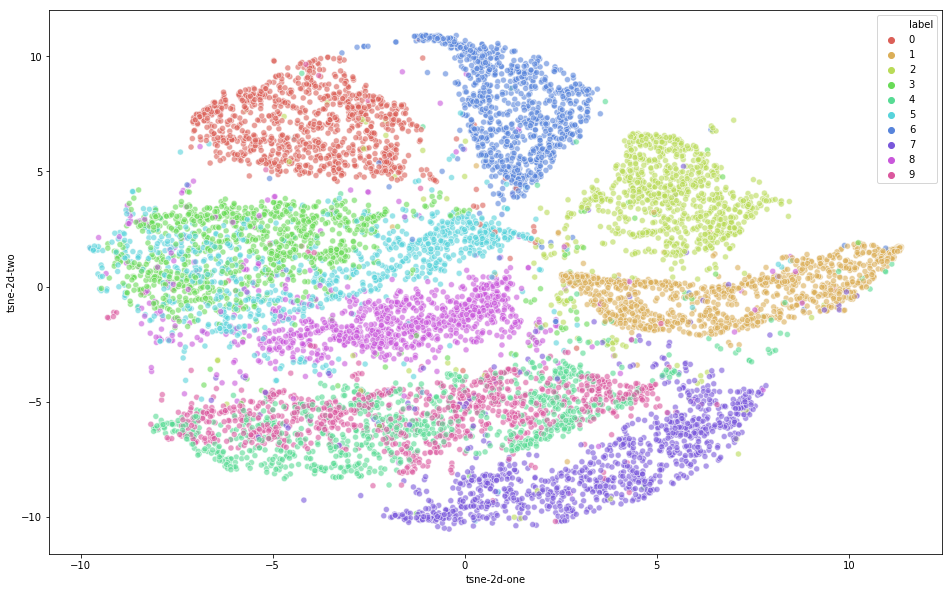

In [12]:
mnist_df_subset['tsne-2d-one'] = tsne_result[:, 0]
mnist_df_subset['tsne-2d-two'] = tsne_result[:, 1]
# from Module
plt.figure(figsize=(16,10))
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='label',
               palette=sns.color_palette('hls', 10),
               data=mnist_df_subset,
               alpha=0.6)

__Question 5 (4 points).__ Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

In [13]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS

In [14]:
mnist_df_subset.loc[:N, '1x1':'28x28'].values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
n_neighbors = 10

In [16]:
clf = LocallyLinearEmbedding(n_neighbors, n_components=2, method='standard')
t0 = time.time()
X_lle = clf.fit_transform(mnist_df_subset.loc[:N, '1x1':'28x28'].values)
print('Time elapsed: {} seconds'.format(time.time()-time_start))


Time elapsed: 300.9544835090637 seconds


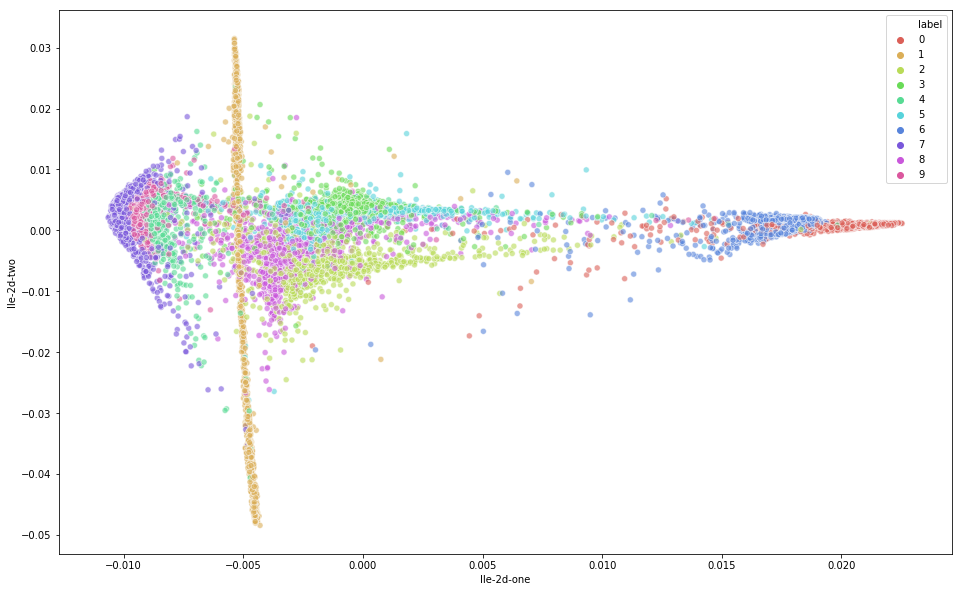

In [17]:
mnist_df_subset['lle-2d-one'] = X_lle[:, 0]
mnist_df_subset['lle-2d-two'] = X_lle [:, 1]
# from Module
plt.figure(figsize=(16,10))
sns.scatterplot(x='lle-2d-one', y='lle-2d-two', hue='label',
               palette=sns.color_palette('hls', 10),
               data=mnist_df_subset,
               alpha=0.6)

In [18]:
print("Computing MDS embedding")
clf = MDS(n_components=2, n_init=1, max_iter=100)
t0 = time.time()
X_mds = clf.fit_transform(mnist_df_subset.loc[:N, '1x1':'28x28'].values)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Computing MDS embedding
Time elapsed: 766.7890734672546 seconds


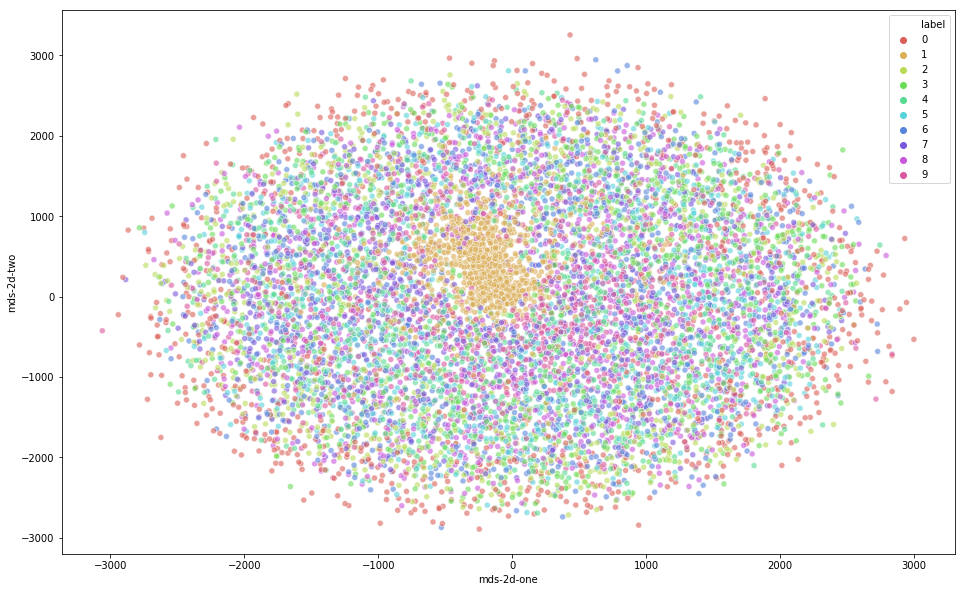

In [19]:
mnist_df_subset['mds-2d-one'] = X_mds[:, 0]
mnist_df_subset['mds-2d-two'] = X_mds [:, 1]
# from Module
plt.figure(figsize=(16,10))
sns.scatterplot(x='mds-2d-one', y='mds-2d-two', hue='label',
               palette=sns.color_palette('hls', 10),
               data=mnist_df_subset,
               alpha=0.6)

# References

* Visualizations from module lesson
* LLE/MDS from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
* Useful description of t-sne: https://www.datacamp.com/community/tutorials/introduction-t-sne
* Attempted to evaluate test set with t-sne, but couldn't, explained here: https://stackoverflow.com/questions/52849890/how-to-implement-t-sne-in-a-model